Take Home Assignment 02: Liquid Level 


**1. Plot of the liquid level.**


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

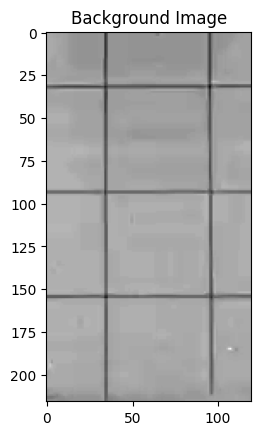

In [20]:
# Reading frames from a video
cap = cv2.VideoCapture('liquidVideo.mp4')

# Read the first frame as the background image (frame 0)
ret, frame_bg = cap.read()

# Convert the first frame to grayscale
frame_bg_gray = cv2.cvtColor(frame_bg, cv2.COLOR_BGR2GRAY)

#display the first frame
title = "Background Image"
plt.title(title)
plt.imshow(frame_bg_gray, cmap='gray')
plt.show()

In [21]:

# To calculte the Liquid level 
liquid_levels_percentage = []  # Liquid level in percentage
frame_count = 0 

#loop through the video frames
while(cap.isOpened()):
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Subtract the background from the current frame
    img_sub = cv2.subtract(frame_bg_gray, frame_gray)

    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # Calculate the area of the largest contour
    rows, cols = img_th.shape
    total_area = rows * cols
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1)
      
    else:
        liquid_level_percentage = 0  # No contour detected, liquid level is 0

    # Store the liquid level for plotting
    liquid_levels_percentage.append(liquid_level_percentage)

    # Increment frame count
    frame_count += 1
    



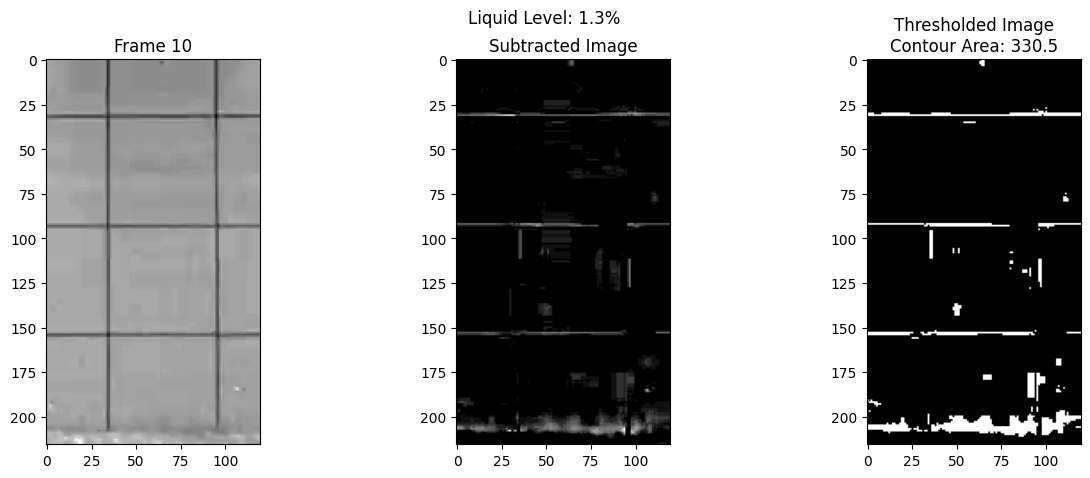

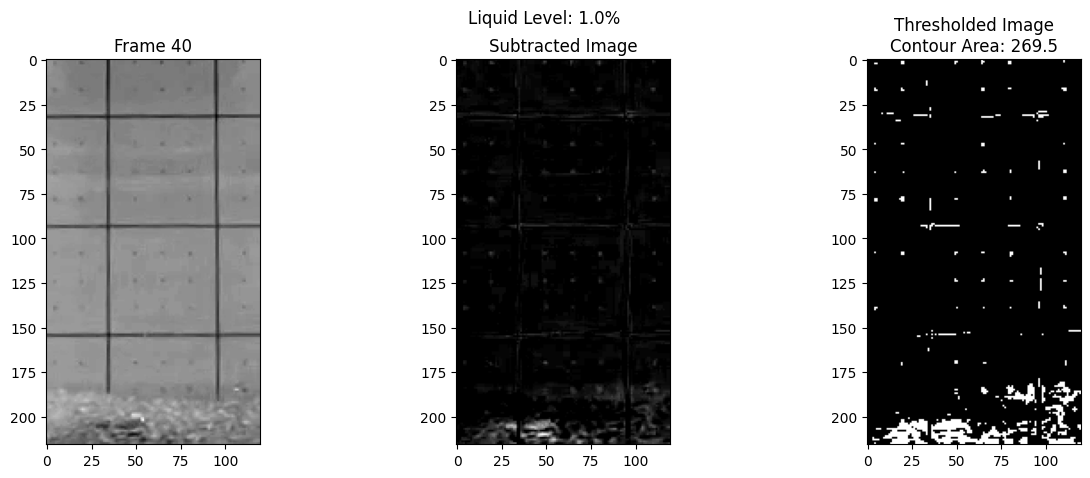

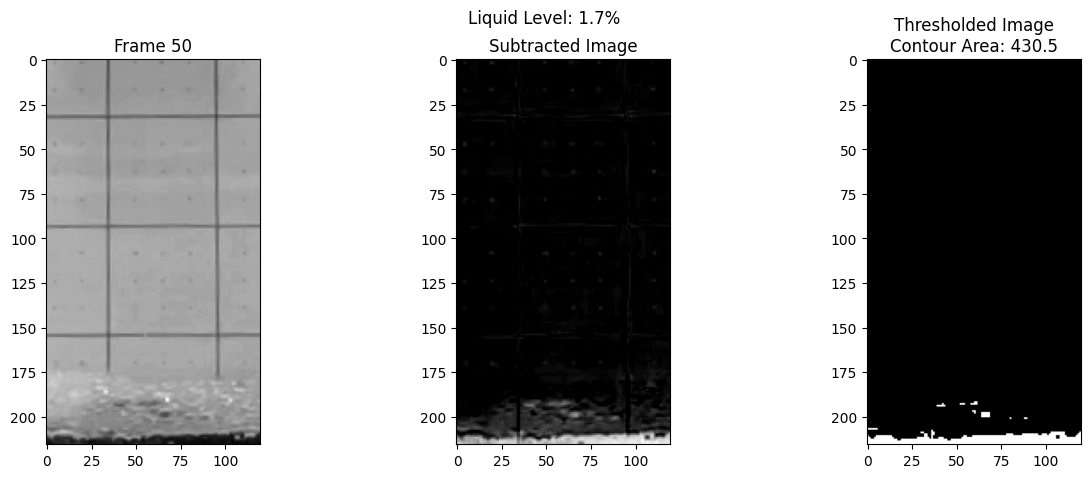

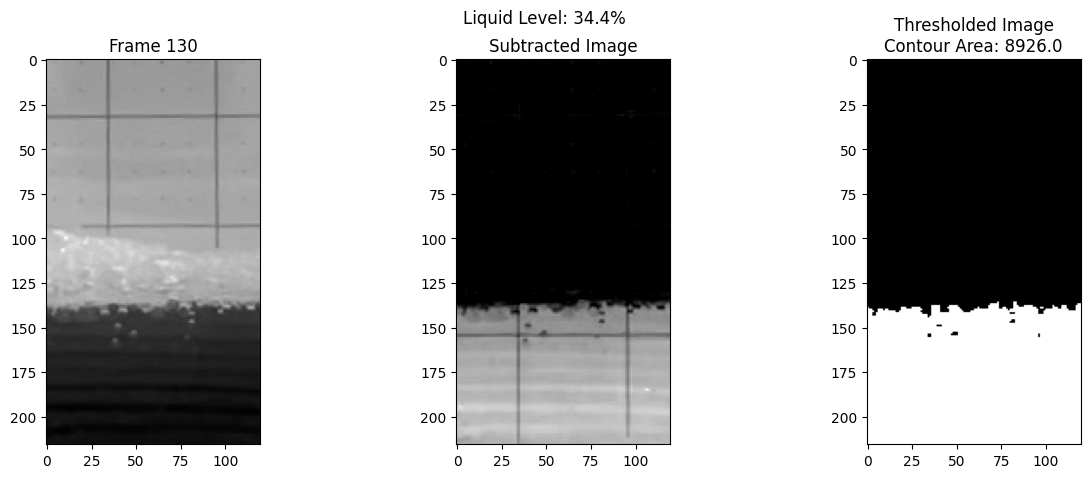

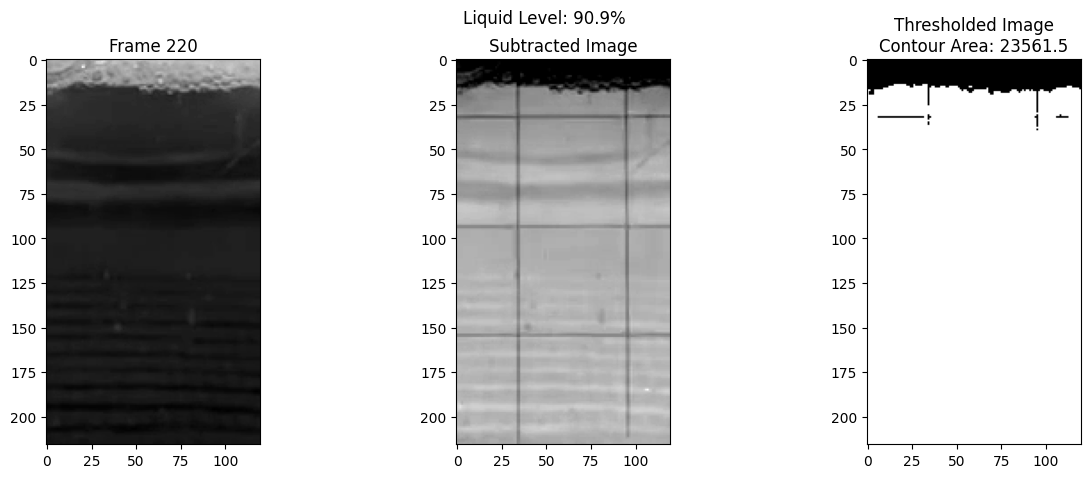

In [22]:
# Randomly display 5 frames with current frame, subtracted image, and thresholded image
import random

# Select 5 random frame indices with +10 interval in ascending order
random_indices = sorted(random.sample(range(0, frame_count, 10), 5))

for idx in random_indices:
    # Set the video capture to the specific frame index
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        continue
    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current frame
    img_sub = cv2.subtract(frame_bg_gray, frame_gray)
    
    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Calculate the area of the largest contour
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1)
    else:
        liquid_level_percentage = 0  # No contour detected, liquid level is 0
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title(f'Frame {idx}')
    plt.imshow(frame_gray, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('Subtracted Image')
    plt.imshow(img_sub, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title(f'Thresholded Image\nContour Area: {largest_contour_area}')
    plt.imshow(img_th, cmap='gray')
    
    plt.suptitle(f'Liquid Level: {liquid_level_percentage}%')
    plt.show()

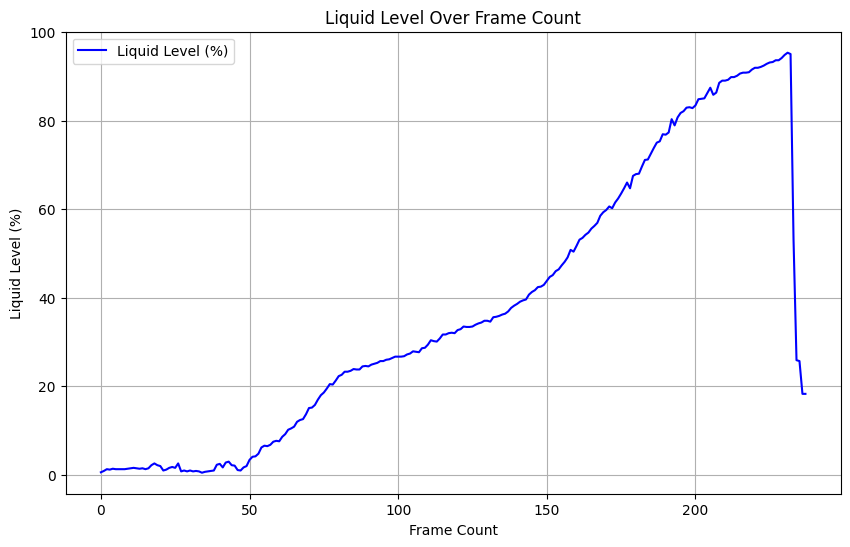

In [ ]:
# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Plot the liquid level percentage over frame count
plt.plot(range(frame_count), liquid_levels_percentage, label='Liquid Level (%)', color='b')

# Set the labels and title
plt.xlabel('Frame Count')
plt.ylabel('Liquid Level (%)')
plt.title('Liquid Level Over Frame Count')

# Add a grid and legend
plt.grid(True)
plt.legend(loc='upper left')

# Show the plot
plt.show()

**2. A brief note on what the student understood by reading the section on Otsu's threholding method.**


Otsu's method is a way to automatically find the best threshold value to separate the foreground (important part) and background in an image. It works well when an image has two distinct areas, like dark and light regions. The method looks at all possible threshold values and chooses the one that makes the two groups (foreground and background) as different as possible.

In OpenCV, Otsu's method is used with the cv2.threshold function and the cv2.THRESH_OTSU flag. For better results, the image can be smoothed with a filter (like Gaussian Blur) before applying this method. It’s commonly used in tasks like scanning documents or separating objects in an image.




**3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.**


In the above generated Liquid level over frame count plot,after 234th frame Liquid percentage got decreased but not that happen in the real video. This happen because of the  erroraneous liquid level reading when using Otsu's threshhold method. 
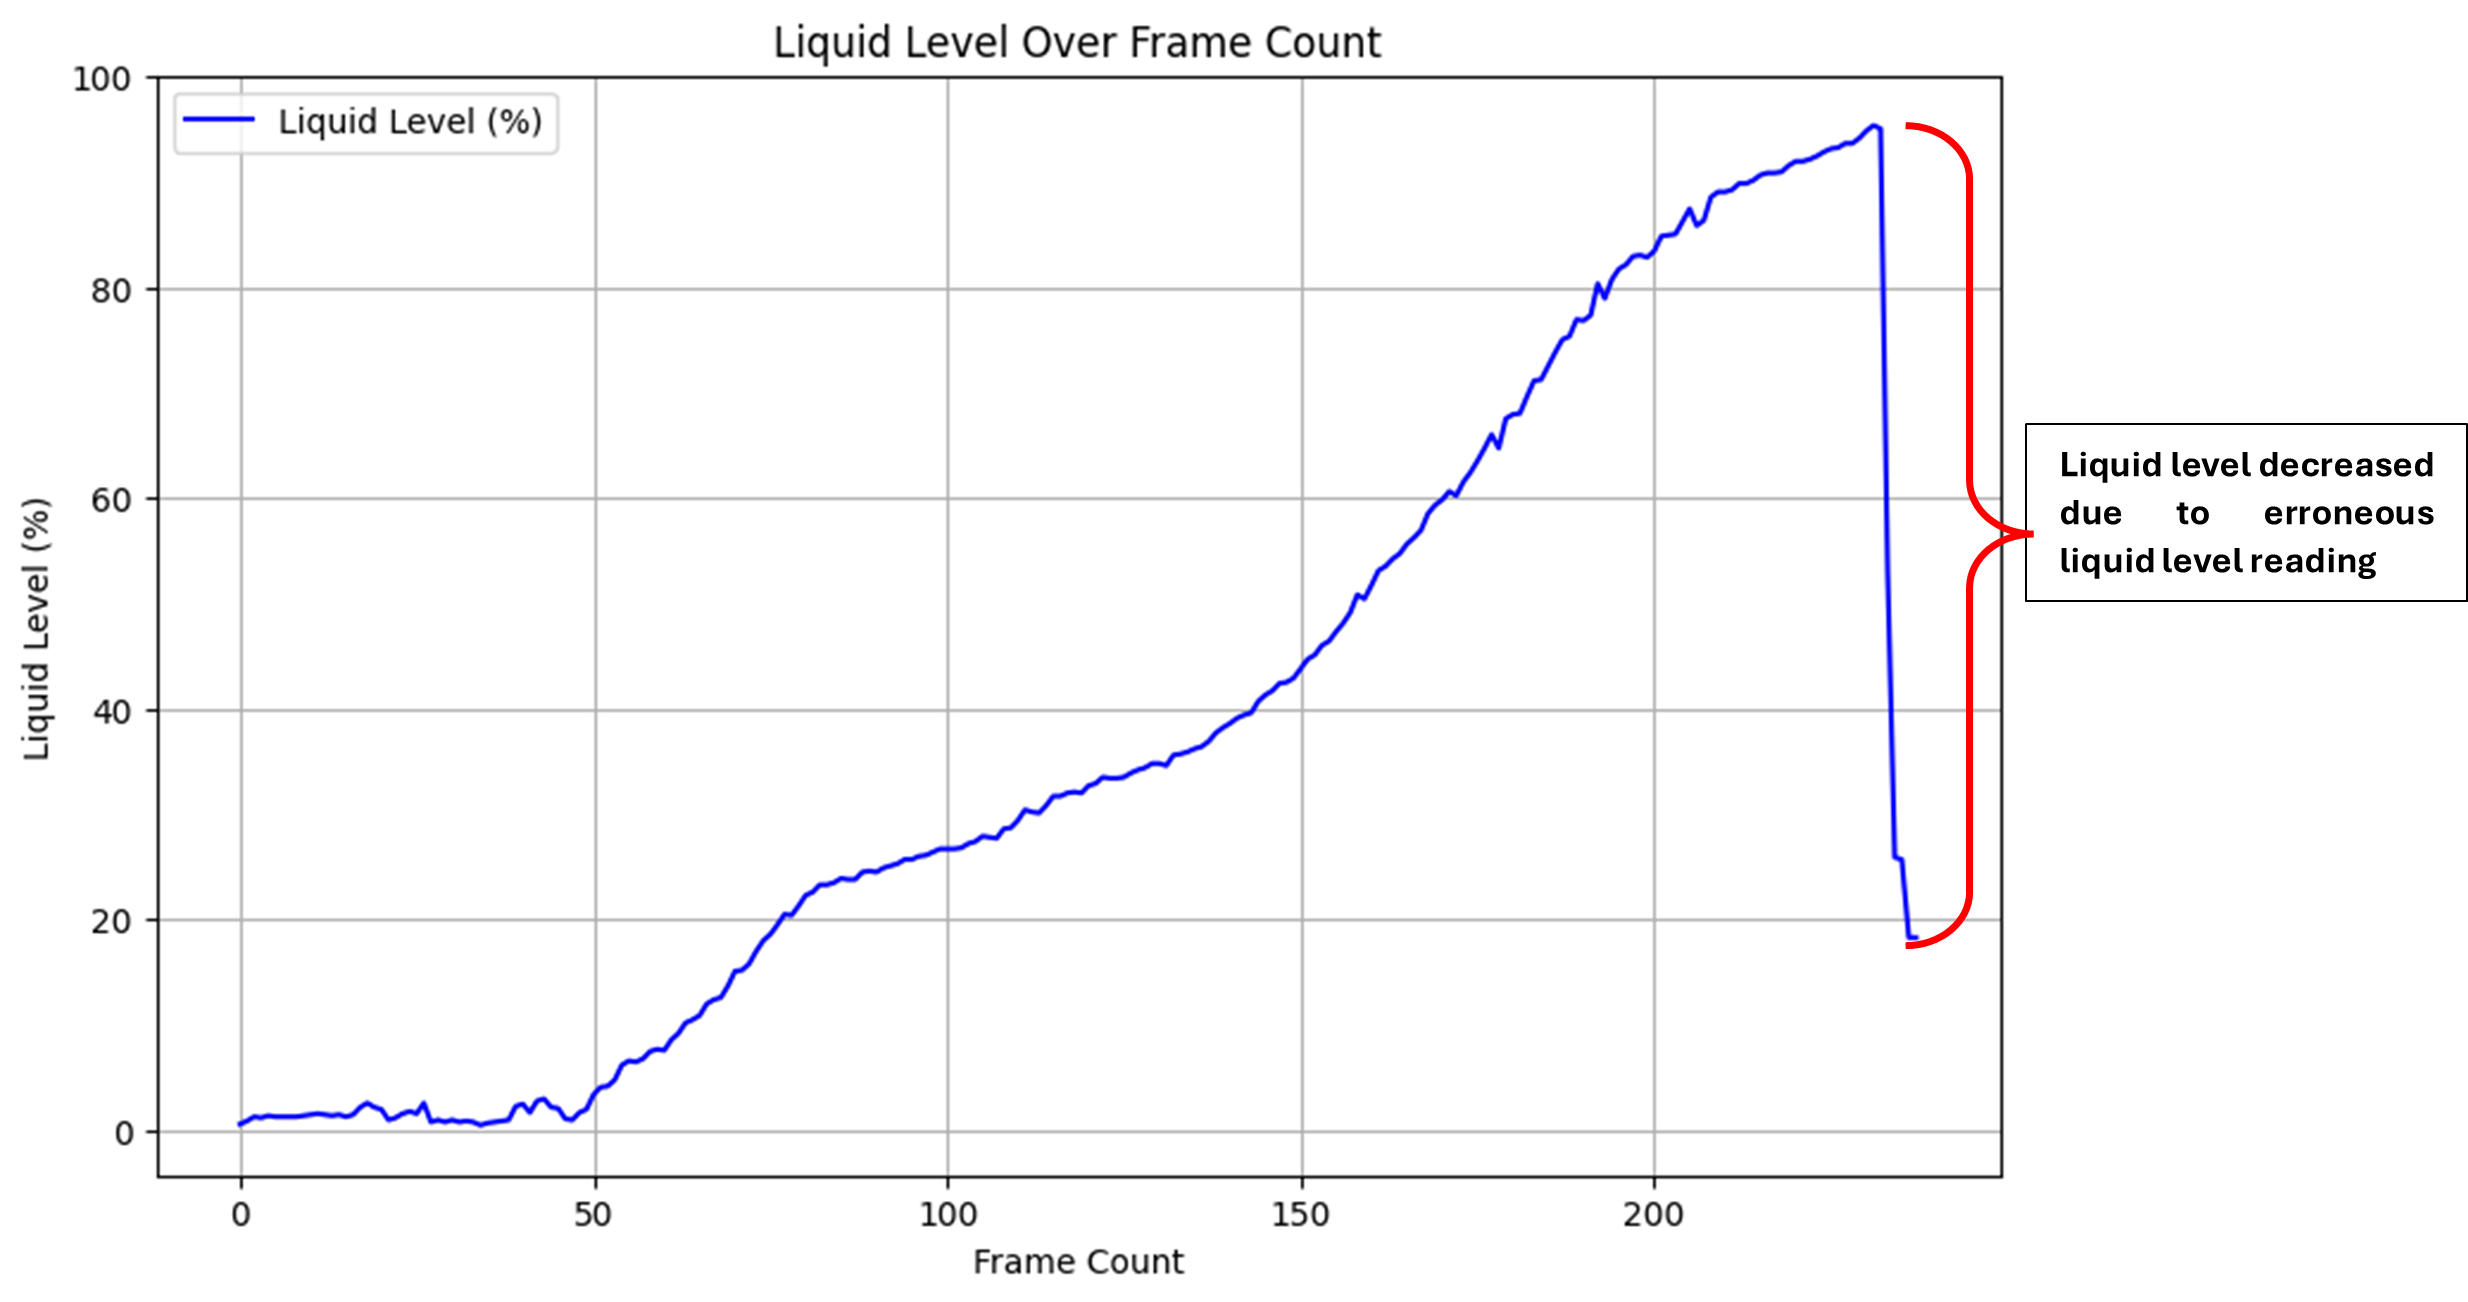


This erroneous liquid level reading happened while contouring after thresholding. After the 234th frame, most of the liquid was filled, and at that time, the subtracted image showed some black line grids in the background. These small square grids were visible in the thresholded image.

These square grids caused multiple contours to split in the thresholded image. As a result, when selecting the largest contour, it only selected the largest split contour from the thresholded image. This is why the plotted graph decreased after the 234th frame.

For example I have attached last 5 frames in the next cell with annotated the contours and shaded the largest counter region below.

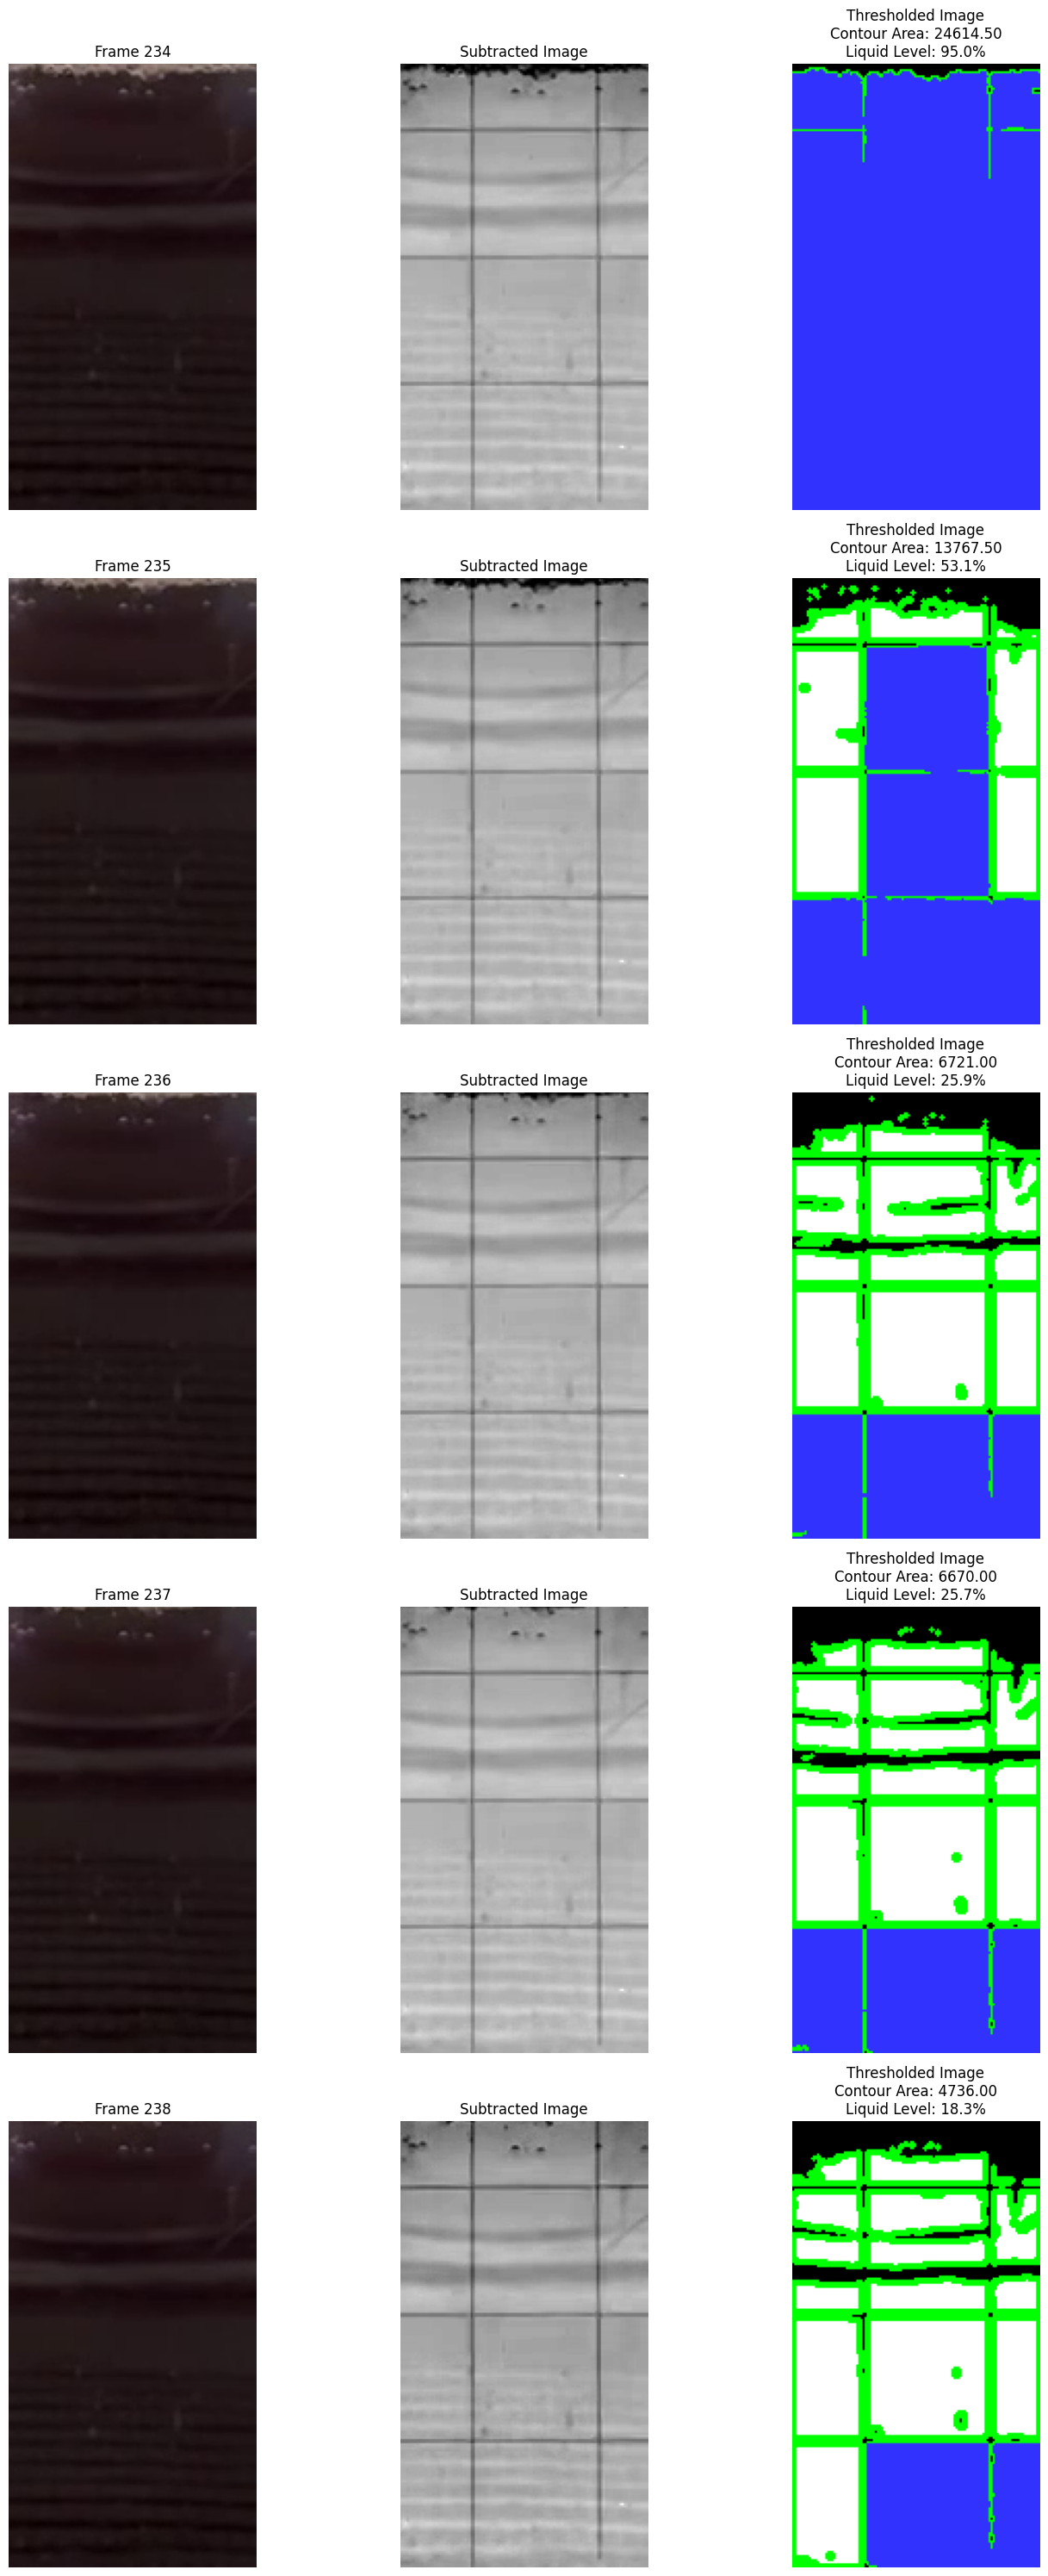

In [ ]:
# Select the last 5 frames
last_frames = range(frame_count - 5,frame_count)

# Create a figure with subplots
fig, axes = plt.subplots(len(last_frames), 3, figsize=(15, 30))

for i, frame_idx in enumerate(last_frames):
    # Set the video to the specific frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        continue

    
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Subtract the background from the current frame
    img_sub = cv2.subtract(frame_bg_gray, frame_gray)
    
    # Thresholding to get a binary image
    ret, img_th = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by size in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Calculate the area of the largest contour
    largest_contour_area = cv2.contourArea(contours[0]) if contours else 0
    liquid_level_percentage = round((largest_contour_area / total_area) * 100, 1) if contours else 0

    #Draw the contour in the thersholded image
    img_th = cv2.cvtColor(img_th, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_th, contours, -1, (0, 255, 0), 2)

    #shade the area of the largest contour in the thresholded image
    if contours:
        cv2.fillPoly(img_th, pts=[contours[0]], color=(50, 50, 255))
        

    # Display the current frame
    axes[i, 0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'Frame {frame_idx}')
    axes[i, 0].axis('off')
    
    # Display the subtracted image
    axes[i, 1].imshow(img_sub, cmap='gray')
    axes[i, 1].set_title('Subtracted Image')
    axes[i, 1].axis('off')
    
    # Display the thresholded image with contour area and liquid percentage
    axes[i, 2].imshow(img_th, cmap='gray')
    axes[i, 2].set_title(f'Thresholded Image\nContour Area: {largest_contour_area:.2f}\nLiquid Level: {liquid_level_percentage:.1f}%')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

Here clearly we can see the erroneous liquid level reading. In the threshold image all contours are annotated with green color line and large contour is shaded with blue color.Finaly this erroneous in reading happend because of that spilted square lines in the threshold image. (When using the Otsu's threshhold method).

**4. A brief description on the final algorithm developed by the student.**

1.**Select Background Frame**:The first frame is selected as the background and converted to grayscale.

2.**Background Subtraction**:For each subsequent frame, convert it to grayscale and subtract the grayscale background from the current frame to highlight the differences (i.e., the liquid level).

3.**Preprocessing**:Apply thresholding to the difference image obtained from the background subtraction to enhance the contours.

4.**Contour Detection**:Use cv2.findContours to detect contours in the thresholded image.

5.**Largest Contour Identification**:Identify the largest contour, which corresponds to the liquid level.

6.**Calculate Liquid Level Percentage**:Calculate the liquid level percentage based on the vertical position of the largest contour relative to the container height.

7.**Store Liquid Level Percentage**:For each frame, store the calculated liquid level percentage and the corresponding frame number.

8.**Plot Liquid Level Over Frame Count**:After processing the video, plot a graph of the liquid level percentage over the frame count using a plotting library like matplotlib.